# Credit Fraud with Imbalanced Datasets

## Project Overview

link dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code?datasetId=310&sortBy=voteCount

Project ini bertujuan membuat model terbaik untuk mengklasifikasi credit fraud dengan data yang tidak seimbang

Kumpulan data berisi transaksi yang dilakukan oleh kartu kredit pada bulan September 2013 oleh pemegang kartu Eropa. Dataset ini menyajikan transaksi yang terjadi dalam dua hari, dimana kami memiliki 492 penipuan dari 284.807 transaksi. Dataset sangat tidak seimbang, kelas positif (penipuan) menyumbang 0,172% dari semua transaksi.

Ini hanya berisi variabel input numerik yang merupakan hasil dari transformasi PCA.
Karena masalah kerahasiaan, fitur asli dan lebih banyak informasi latar belakang tentang data tidak disediakan.

* Fitur V1, V2, ... V28 adalah komponen utama yang diperoleh dengan PCA;
* Satu-satunya fitur yang belum diubah dengan PCA adalah Waktu dan Jumlah. Waktu Fitur berisi detik yang berlalu antara setiap transaksi dan transaksi pertama dalam kumpulan data. Jumlah fitur adalah Jumlah transaksi, fitur ini dapat digunakan untuk pembelajaran sensitif biaya yang bergantung pada contoh.
* Kelas Fitur adalah variabel respon dan dibutuhkan nilai 1 jika terjadi penipuan dan 0 sebaliknya.

## IMPORT DATA & MODULE

### Load data menggunakan API KAGGLE

In [5]:
# C:\Users\USER\.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"syahmisajid12","key":"********************"}'}

In [6]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Load Data dari Kaggle

In [7]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


Import Module

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Function

In [9]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py

# Import helper functions we're going to use
from helper_functions import unzip_data

--2023-06-18 07:14:15--  https://raw.githubusercontent.com/Syahmi33github/Emotion-Classification/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11485 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.22K  --.-KB/s    in 0s      

2023-06-18 07:14:15 (60.7 MB/s) - ‘helper_functions.py’ saved [11485/11485]



## EXPLORATORY DATA ANALYSIS

In [10]:
unzip_data("/content/creditcardfraud.zip")

In [11]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
df.shape

(284807, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dapat terlihat tidak terdapat null pada Data

In [15]:
df["Class"].unique()

array([0, 1])

In [16]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Catatan: Perhatikan betapa tidak seimbangnya kumpulan data asli! Sebagian besar transaksi non-penipuan. Jika kami menggunakan kerangka data ini sebagai dasar untuk model dan analisis prediktif kami, kami mungkin mendapatkan banyak kesalahan dan algoritme kami mungkin akan terlalu cocok karena akan "menganggap" bahwa sebagian besar transaksi bukanlah penipuan. Tapi kami tidak ingin model kami berasumsi, kami ingin model kami mendeteksi pola yang memberikan tanda-tanda penipuan!

<Axes: xlabel='Class', ylabel='count'>

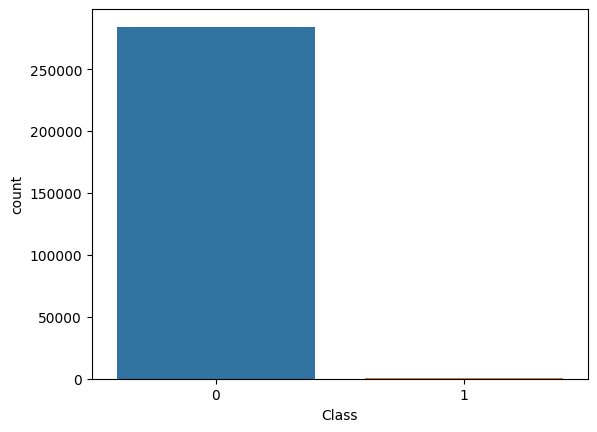

In [18]:
sns.countplot(x="Class", data=df)

Distribusi: Dengan melihat distribusi kita dapat mengetahui seberapa miring fitur-fitur ini, kita juga dapat melihat distribusi lebih lanjut dari fitur-fitur lainnya. Ada teknik yang dapat membantu distribusi agar tidak terlalu miring yang akan diterapkan di notebook ini di masa mendatang.

(0.0, 172792.0)

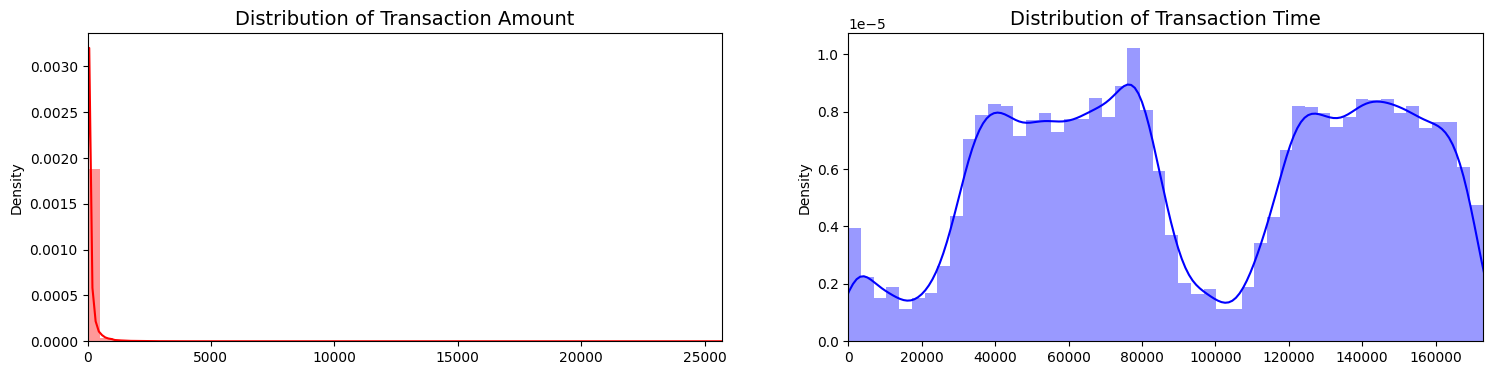

In [19]:
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

## Data Pre Processing

### Scaling and Distributing

Pertama yang harus dilakukan adalah melakukan scaling pada kolom Time dan Amount agar sama dengan kolom lain. Selanjutnya juga perlu dibuat sub sampel kerangka data agar memiliki jumlah kasus Penipuan dan Non-Penipuan yang sama, membantu algoritme kami lebih memahami pola yang menentukan apakah suatu transaksi merupakan penipuan atau bukan.

#### Apa itu sub-Sample?

Dalam skenario ini, subsampel kami akan menjadi kerangka data dengan rasio transaksi penipuan dan non-penipuan 50/50. Artinya sub-sampel kami akan memiliki jumlah transaksi penipuan dan non-penipuan yang sama.

#### Kenapa kita harus membuat sub-Sample?

* Overfitting: Model klasifikasi kami akan mengasumsikan bahwa dalam banyak kasus tidak ada penipuan! Yang kami inginkan untuk model kami adalah memastikan kapan penipuan terjadi.
* Korelasi yang Salah: Meskipun kami tidak tahu kepanjangan dari fitur "V", akan berguna untuk memahami bagaimana masing-masing fitur ini memengaruhi hasil (Penipuan atau Tanpa Penipuan) dengan memiliki kerangka data yang tidak seimbang yang tidak dapat kami lihat korelasi yang benar antara kelas dan fitur.

#### Summary

* Kolom Time dan Amount adalah nilai yang akan diskalakan.
* Ada 492 kasus penipuan di dataset kami sehingga kami bisa mendapatkan 492 kasus non-penipuan secara acak untuk membuat sub kerangka data baru kami.
* Menggabungkan 492 kasus penipuan dan bukan penipuan, membuat sub-sampel baru.

In [20]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [21]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Split Data

Sebelum melanjutkan dengan teknik Random UnderSampling kita harus memisahkan kerangka data asli. Mengapa? untuk tujuan pengujian, ingat meskipun kami memisahkan data saat menerapkan teknik Random UnderSampling atau OverSampling, kami ingin menguji model kami pada set pengujian asli, bukan pada set pengujian yang dibuat oleh salah satu dari teknik ini. Tujuan utamanya adalah untuk menyesuaikan model baik dengan kerangka data yang undersample dan oversample (agar model kami dapat mendeteksi pola), dan mengujinya pada set pengujian asli.

Splitting menggunakan StratifiedKFold dan bukan menggunakan Train_test_split dikarenakan variabel target pada dataset yang tidak seimbang

In [22]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
115992,0.460980,-0.124414,-0.425057,0.849156,1.226142,0.708086,-0.047749,-0.121907,0.649376,0.057568,...,-0.099071,0.098259,0.183787,-0.104800,-0.034909,-0.448521,-0.449292,0.064656,0.133608,0
101509,4.164047,-0.197782,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,...,-1.463994,-0.665172,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,1
119596,-0.223713,-0.107873,-0.192511,0.897063,2.090686,0.991399,-0.192774,-0.773810,0.695674,-0.345058,...,0.265774,-0.191966,-0.379584,-0.030380,0.719189,-0.459638,0.276302,-0.068824,-0.101330,0
255403,-0.237965,0.851925,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,...,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,1
150660,0.319989,0.107626,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,...,0.483930,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,1


In [23]:
new_df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

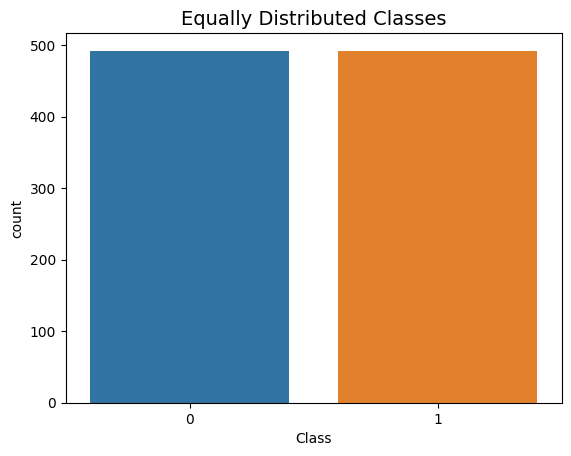

In [24]:
sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [25]:
new_df.corr()['Class'].sort_values(ascending=False)

Class            1.000000
V4               0.708663
V11              0.683195
V2               0.498836
V19              0.258451
V20              0.178963
V21              0.133616
V27              0.101208
V28              0.100556
scaled_amount    0.073468
V26              0.067301
V8               0.058122
V25              0.039145
V22              0.019633
V23             -0.021869
V13             -0.055258
V15             -0.067281
V24             -0.069355
scaled_time     -0.113380
V5              -0.377219
V6              -0.417613
V1              -0.445330
V18             -0.456596
V7              -0.475463
V9              -0.556483
V17             -0.558058
V3              -0.568261
V16             -0.597138
V10             -0.630715
V12             -0.684510
V14             -0.751003
Name: Class, dtype: float64

Korelasi masing masing Feature Terhadap Variabel Target

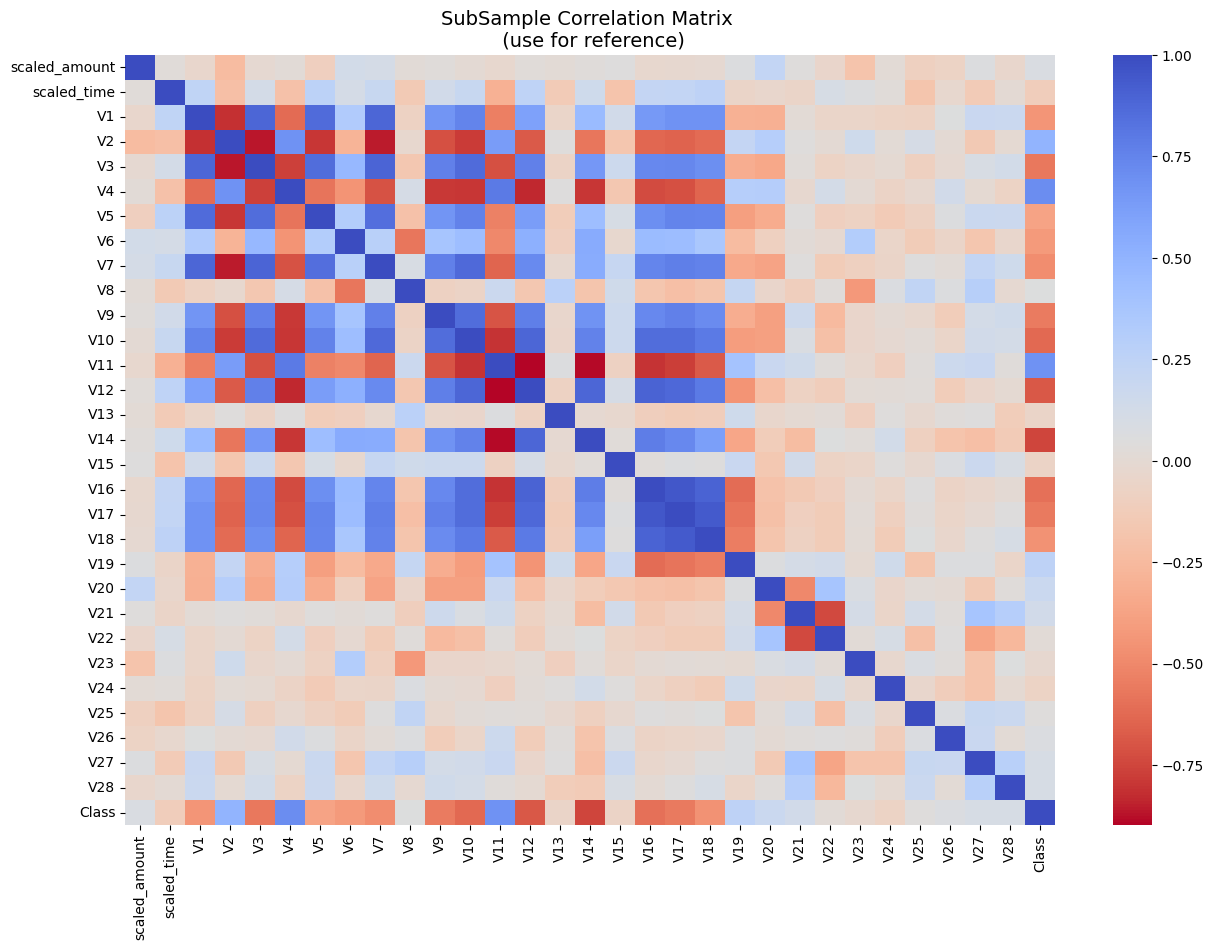

In [26]:
# Make sure we use the subsample in our correlation

f, (ax1) = plt.subplots(1, 1, figsize=(15,10))

# Entire DataFrame
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':5}, ax=ax1)
ax1.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

* **Negative Correlations:** V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
* **Positive Correlations:** V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
* **BoxPlots:** We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

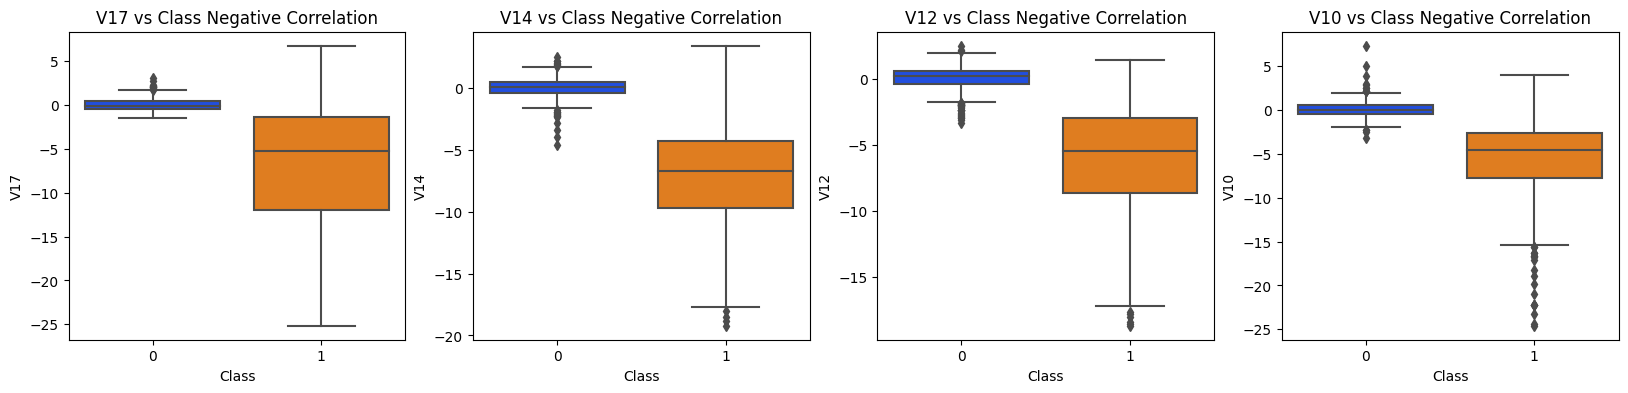

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette='bright', ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette='bright', ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette='bright', ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette='bright', ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

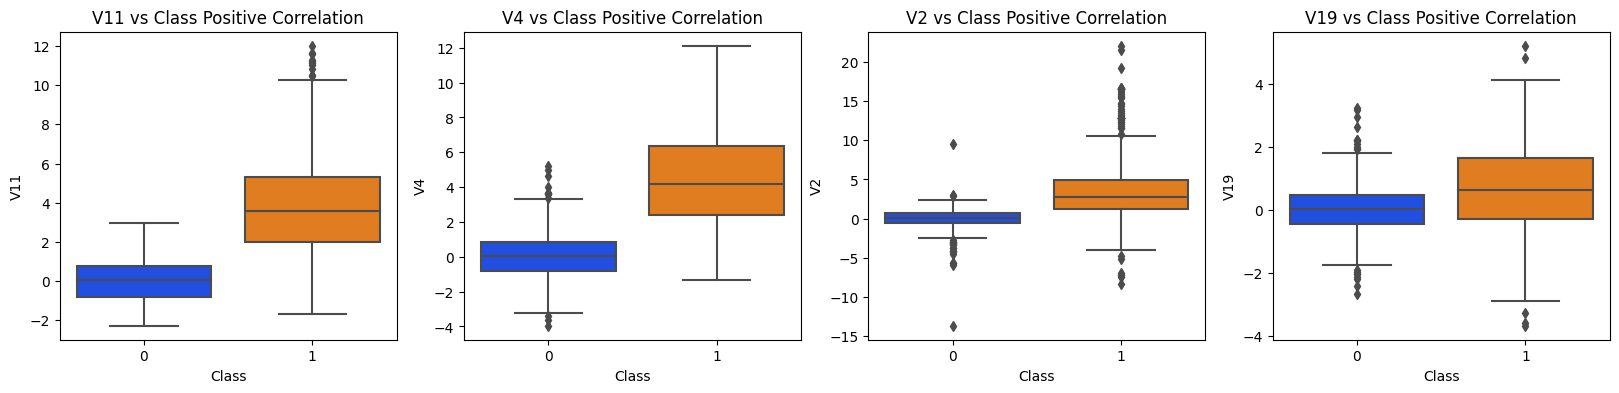

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette='bright', ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette='bright', ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette='bright', ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette='bright', ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Tujuan utama kami di bagian ini adalah untuk menghapus "extreme outlier" dari fitur yang memiliki korelasi tinggi dengan kelas kami. Ini akan berdampak positif pada keakuratan model kami.

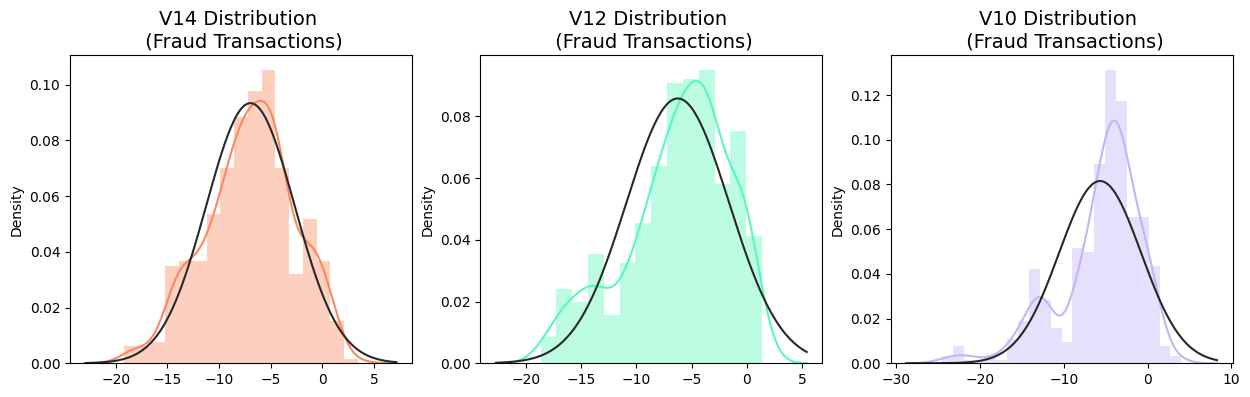

In [29]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### Penghapusan Outlier

Harus berhati-hati tentang seberapa jauh menginginkan ambang batas untuk menghilangkan outlier. Kami menentukan ambang batas dengan mengalikan angka (mis: 1,5) dengan (Jangkauan Interkuartil). Semakin tinggi ambang ini, semakin sedikit outlier yang akan terdeteksi (dikalikan dengan angka yang lebih tinggi, mis: 3), dan semakin rendah ambang ini, semakin banyak outlier yang akan dideteksi.


Pengorbanan: Semakin rendah ambang batas, semakin banyak outlier yang akan dihapus, namun kami ingin lebih fokus pada "outlier ekstrem" daripada hanya outlier. Mengapa? karena kami mungkin menghadapi risiko kehilangan informasi yang akan menyebabkan model kami memiliki akurasi yang lebih rendah. Anda dapat bermain dengan ambang batas ini dan melihat pengaruhnya terhadap keakuratan model klasifikasi kami.

In [30]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.6837146333443, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-23.2282548357516, -18.913243

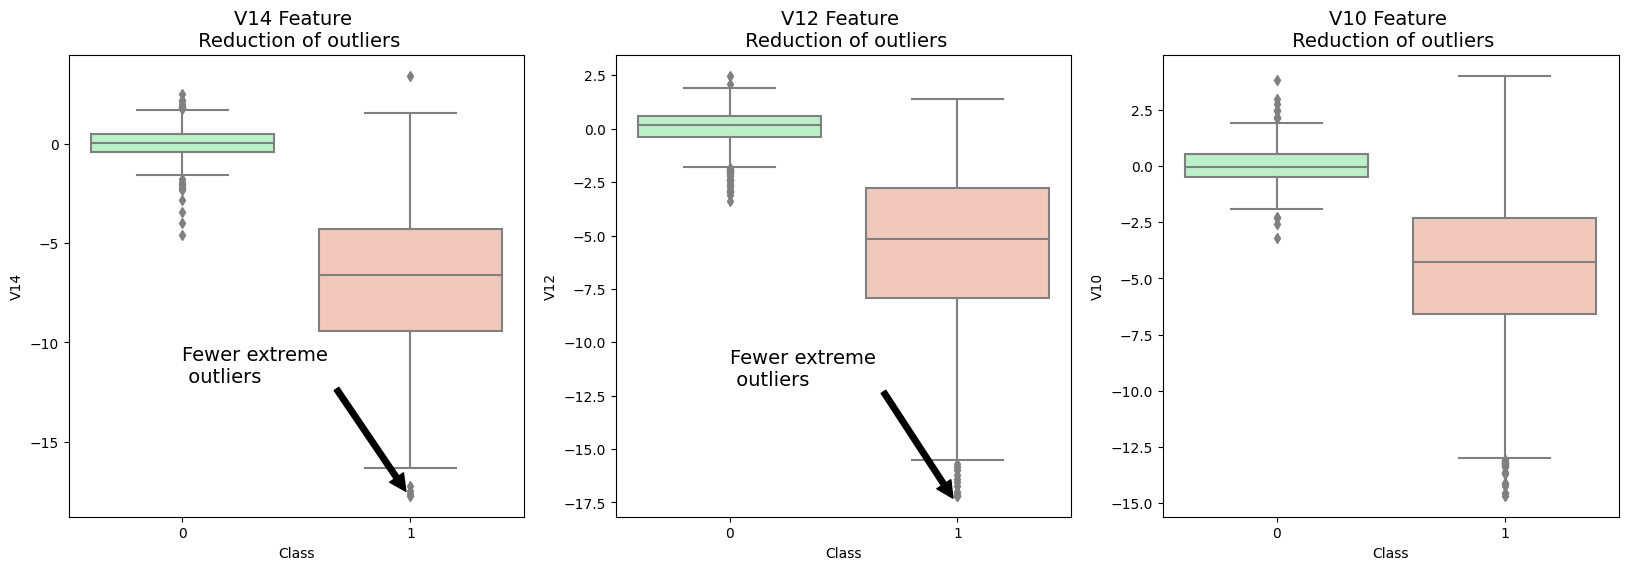

In [31]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## Dimensionality Reduction and Clustering

* Algoritme t-SNE dapat secara akurat mengelompokkan kasus penipuan dan non-penipuan dalam kumpulan data kami.
* Meskipun subsampelnya cukup kecil, algoritme t-SNE mampu mendeteksi cluster dengan cukup akurat di setiap skenario (saya mengocok dataset sebelum menjalankan t-SNE)
* Bertujuan untuk melihat apakah ada pola tertentu antara kasus penipuan dan non-penipuan

In [32]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 8.3 s
PCA took 0.022 s
Truncated SVD took 0.0093 s


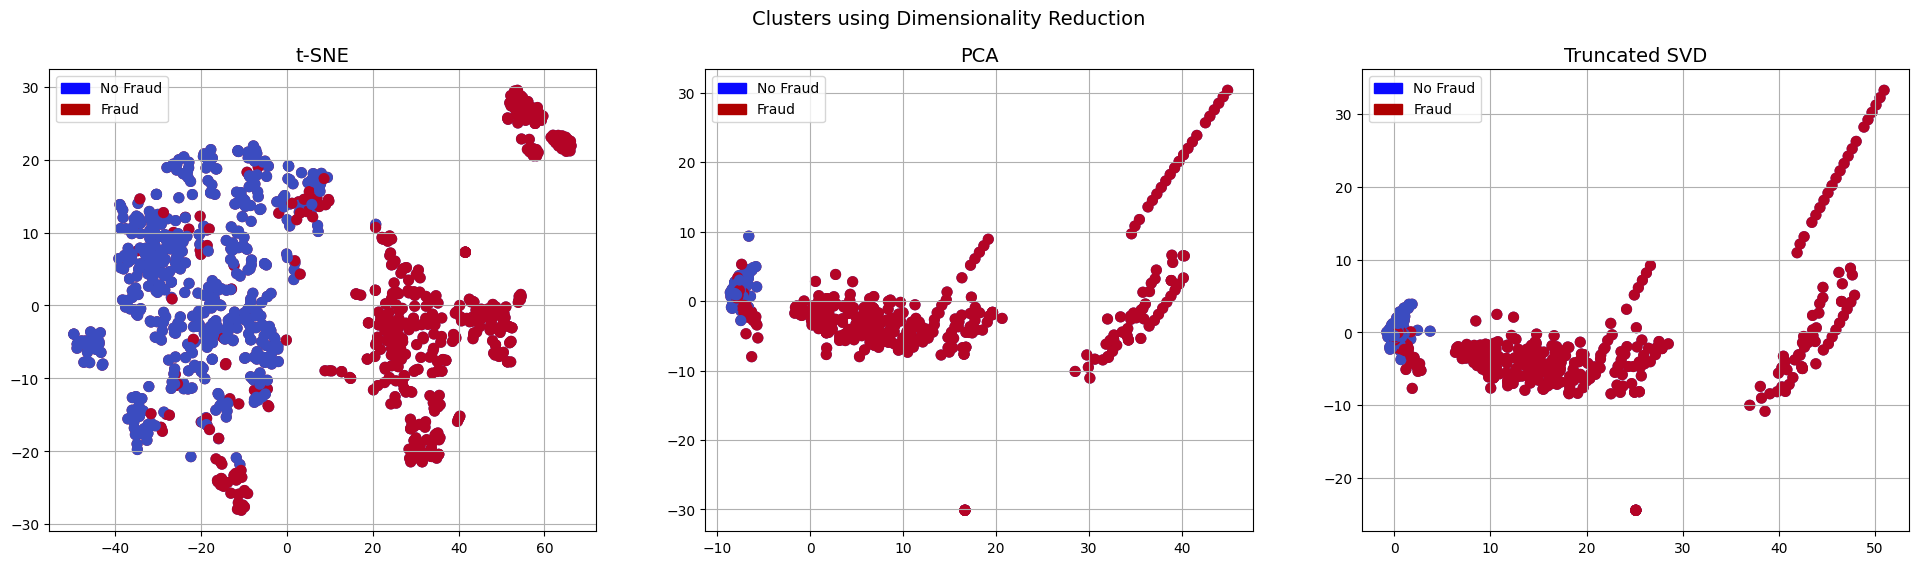

In [33]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Ini memberi kami indikasi bahwa model prediktif lebih lanjut akan bekerja cukup baik dalam memisahkan kasus penipuan dari kasus non-penipuan.

## Modeling

In [34]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [35]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier()
}

In [38]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


In [39]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

# RandomForest Classifier
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

randomfr_params = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

grid_randomfr = GridSearchCV(RandomForestClassifier(), randomfr_params)
grid_randomfr.fit(X_train, y_train)

# tree best estimator
randomfr = grid_randomfr.best_estimator_

In [40]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
acc_log = round(log_reg_score.mean() * 100, 2).astype(str) + '%'
print('Logistic Regression Cross Validation Score:', acc_log)

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
acc_knn = round(knears_score.mean() * 100, 2).astype(str) + '%'
print('Knears Neighbors Cross Validation Score:', acc_knn)

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
acc_svc = round(svc_score.mean() * 100, 2).astype(str) + '%'
print('Support Vector Classifier Cross Validation Score:', acc_svc)

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
acc_tree = round(tree_score.mean() * 100, 2).astype(str) + '%'
print('DecisionTree Classifier Cross Validation Score:', acc_tree)

randomfr_score = cross_val_score(randomfr, X_train, y_train, cv=5)
acc_rf = round(randomfr_score.mean() * 100, 2).astype(str) + '%'
print('Random Forest Cross Validation Score:', acc_rf)

Logistic Regression Cross Validation Score: 93.39%
Knears Neighbors Cross Validation Score: 92.73%
Support Vector Classifier Cross Validation Score: 93.0%
DecisionTree Classifier Cross Validation Score: 90.75%
Random Forest Cross Validation Score: 92.74%


In [41]:
Model = ["Logistic Regression", "KNN", "Support Vector", "DecisionTree", "Random Forest"]
acc = [acc_log,acc_knn,acc_svc,acc_tree,acc_rf]
df_acc = pd.DataFrame(data=acc, index=Model, columns = ["accuracy"])
df_acc
df_acc.sort_values('accuracy', ascending=False)

,accuracy
Logistic Regression,93.39%
Support Vector,93.0%
Random Forest,92.74%
KNN,92.73%
DecisionTree,90.75%


### **Model Terbaik : Logistic Regressiob & SVM**